![](images/jdg_ml_cover.png)

### Introduction to Machine Learning

Types  of **Learning Problems**:

- **Supervised Learning**:   data comes with additional attributes that we want to predict.

   -  **Classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data.
   
   - **Regression**:  if the desired output consists of one or more continuous variables, then the task is called regression.
   
- **Unsupervised Learning**: in which the training data consists of a set of input vectors x without any corresponding target values.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Credit.csv', index_col = 0)

In [4]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


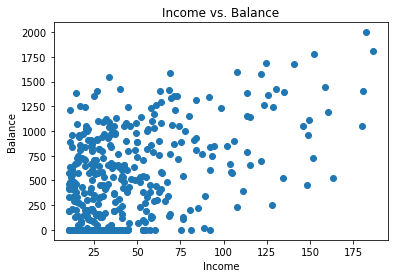

In [5]:
plt.scatter(df.Income, df.Balance)
plt.xlabel('Income')
plt.title('Income vs. Balance')
plt.ylabel('Balance');


**Linear Regression**

- $Balance = Income \times coeficient + intercept$

- Balance = Income * w1 + Education * w2 + Married * w3 + intercept

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()
lr.fit(df[['Income']], df['Balance'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(f'The equation of the line of best fit is y = {lr.coef_[0]:.2f}*income + {lr.intercept_:.2f}')

The equation of the line of best fit is y = 6.05*income + 246.51


In [9]:
def y(x): return x*lr.coef_[0] + lr.intercept_

Text(0, 0.5, 'Balance')

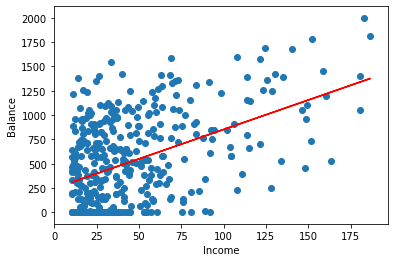

In [10]:
plt.plot(df.Income, y(df.Income), color = 'red')
plt.scatter(df.Income, df.Balance)
plt.xlabel('Income')
plt.ylabel('Balance')

### Credit Default

In [11]:
credit = pd.read_csv('data/default.csv')

In [12]:
credit.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [13]:
credit.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

Text(0, 0.5, 'Default')

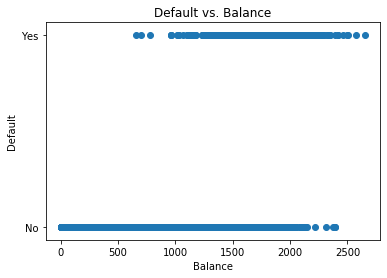

In [14]:
plt.scatter(credit.balance, credit.default)
plt.title('Default vs. Balance');
plt.xlabel('Balance')
plt.ylabel('Default')

### Linear Regression?

$$\text{Default} = a*\text{balance} + b$$
![](images/reg_1.png)

In [15]:
credit.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [16]:
import numpy as np
credit['default'] = np.where(credit.default == 'Yes', 1, 0)
credit['student'] = np.where(credit.student == 'Yes', 1, 0)

In [17]:
credit.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


### Logistic Regression

**Classification** algorithm that returns information about probability of class inclusion.

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lgr = LogisticRegression()

In [20]:
X = credit[['balance']]
y = credit.default

In [21]:
lgr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
from scipy.special import expit
loss = expit(lgr.coef_*X.as_matrix() + lgr.intercept_).ravel()

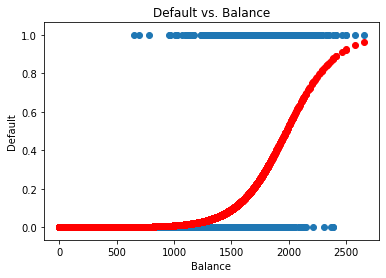

In [23]:
plt.scatter(credit.balance, credit.default)
plt.title('Default vs. Balance');
plt.xlabel('Balance')
plt.ylabel('Default')
plt.plot(credit.balance, loss, 'ro')

In [24]:
pd.DataFrame(lgr.predict_proba(X), columns=['probab_no', 'probab_yes']).head()

,probab_no,probab_yes
0,0.997468,0.002532
1,0.996154,0.003846
2,0.987014,0.012986
3,0.999027,0.000973
4,0.996691,0.003309


In [25]:
import mglearn

/Users/koehlejf/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/koehlejf/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Clustering and KMeans



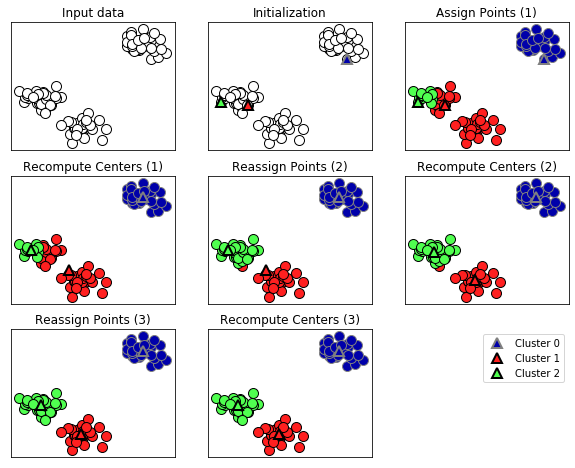

In [26]:
mglearn.plots.plot_kmeans_algorithm()

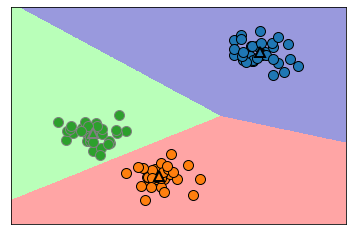

In [27]:
mglearn.plots.plot_kmeans_boundaries()

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

### Hyperparameter Tuning

<center>
    <img src = https://miro.medium.com/max/850/1*0215Gzmw56XvORtB7-Torw.png>
    </center>

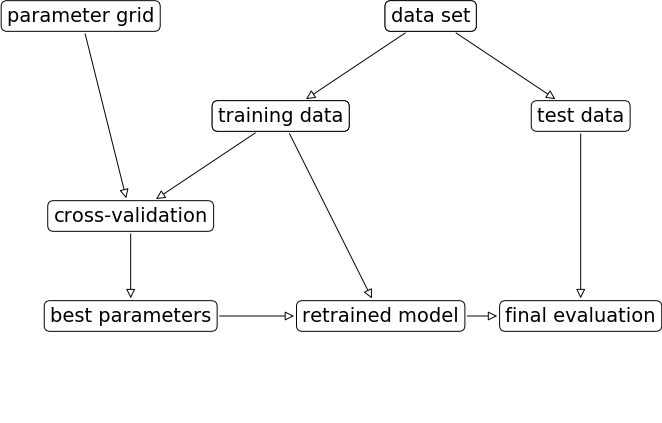

In [28]:
mglearn.plots.plot_grid_search_overview()

/Users/koehlejf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


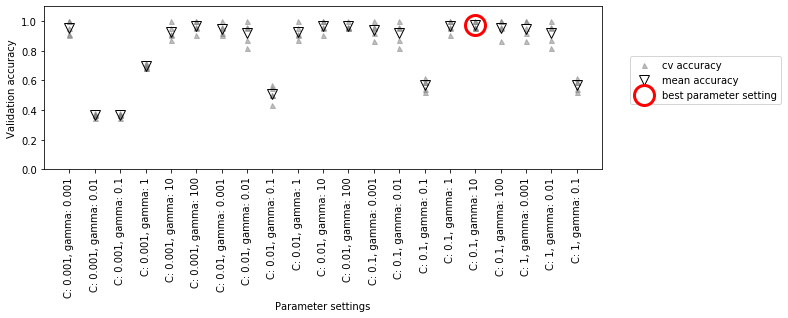

In [29]:
mglearn.plots.plot_cross_val_selection()

### Tree Models

<center>
    <img src = https://i0.wp.com/dataaspirant.com/wp-content/uploads/2017/01/Decision_tree_example.jpg?w=797&ssl=1>
    </center>

### Ensemble Methods

<center>
    <img src = https://miro.medium.com/max/2000/0*_qR1_TDjTpchTmDE.>
    </center>